# Proportion Overlap 

First, looking at all CpGs and what genomic feature they overlap. Then, looking at the methylated CpGs for each treatment combination and seeing what genomic features they overlap.

Then want to know if there is a difference in the proportion of methylated CpGs that overlap with genomic features. I'll do a chi-squared test of homogeneity to calculate stats on this. 

The null hypothesis that the methylated CpGs are independent of genomic location

In [23]:
library(tidyverse)
library(RColorBrewer)

# for combining plots in a grid
library(patchwork)
library(cowplot)

In [4]:
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/proportion_overlap/propOverlap_decimal.csv')
df

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap
<chr>,<chr>,<int>,<int>,<dbl>
TE,CC,16875,132243,0.12760600
exons,CC,57957,132243,0.43826138
introns,CC,29638,132243,0.22411772
putativePromoter,CC,3529,132243,0.02668572
UTRs,CC,4165,132243,0.03149505
intergenic,CC,20079,132243,0.15183412
TE,CH,6346,54342,0.11677892
exons,CH,26233,54342,0.48273895
introns,CH,12045,54342,0.22165176


assign phase 1 and phase 2

In [19]:
df <- df %>%
  mutate(phase1 = case_when(
    substr(df$treatment, 1, 1) == "C" ~ "Control",
    substr(df$treatment, 1, 1) == "H" ~ "Hypoxic",
    TRUE ~ ""
  ),
  phase2 = case_when(
    substr(df$treatment, 2, 2) == "C" ~ "Control",
    substr(df$treatment, 2, 2) == "H" ~ "Hypoxic",
    TRUE ~ "All CpGs"
  ))

df

# changing the original df to include this info
write.csv(df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/proportion_overlap/propOverlap_decimal.csv')

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap,phase1,phase2
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>
TE,CC,16875,132243,0.12760600,Control,Control
exons,CC,57957,132243,0.43826138,Control,Control
introns,CC,29638,132243,0.22411772,Control,Control
putativePromoter,CC,3529,132243,0.02668572,Control,Control
UTRs,CC,4165,132243,0.03149505,Control,Control
intergenic,CC,20079,132243,0.15183412,Control,Control
TE,CH,6346,54342,0.11677892,Control,Hypoxic
exons,CH,26233,54342,0.48273895,Control,Hypoxic
introns,CH,12045,54342,0.22165176,Control,Hypoxic


ggplot without facetting:

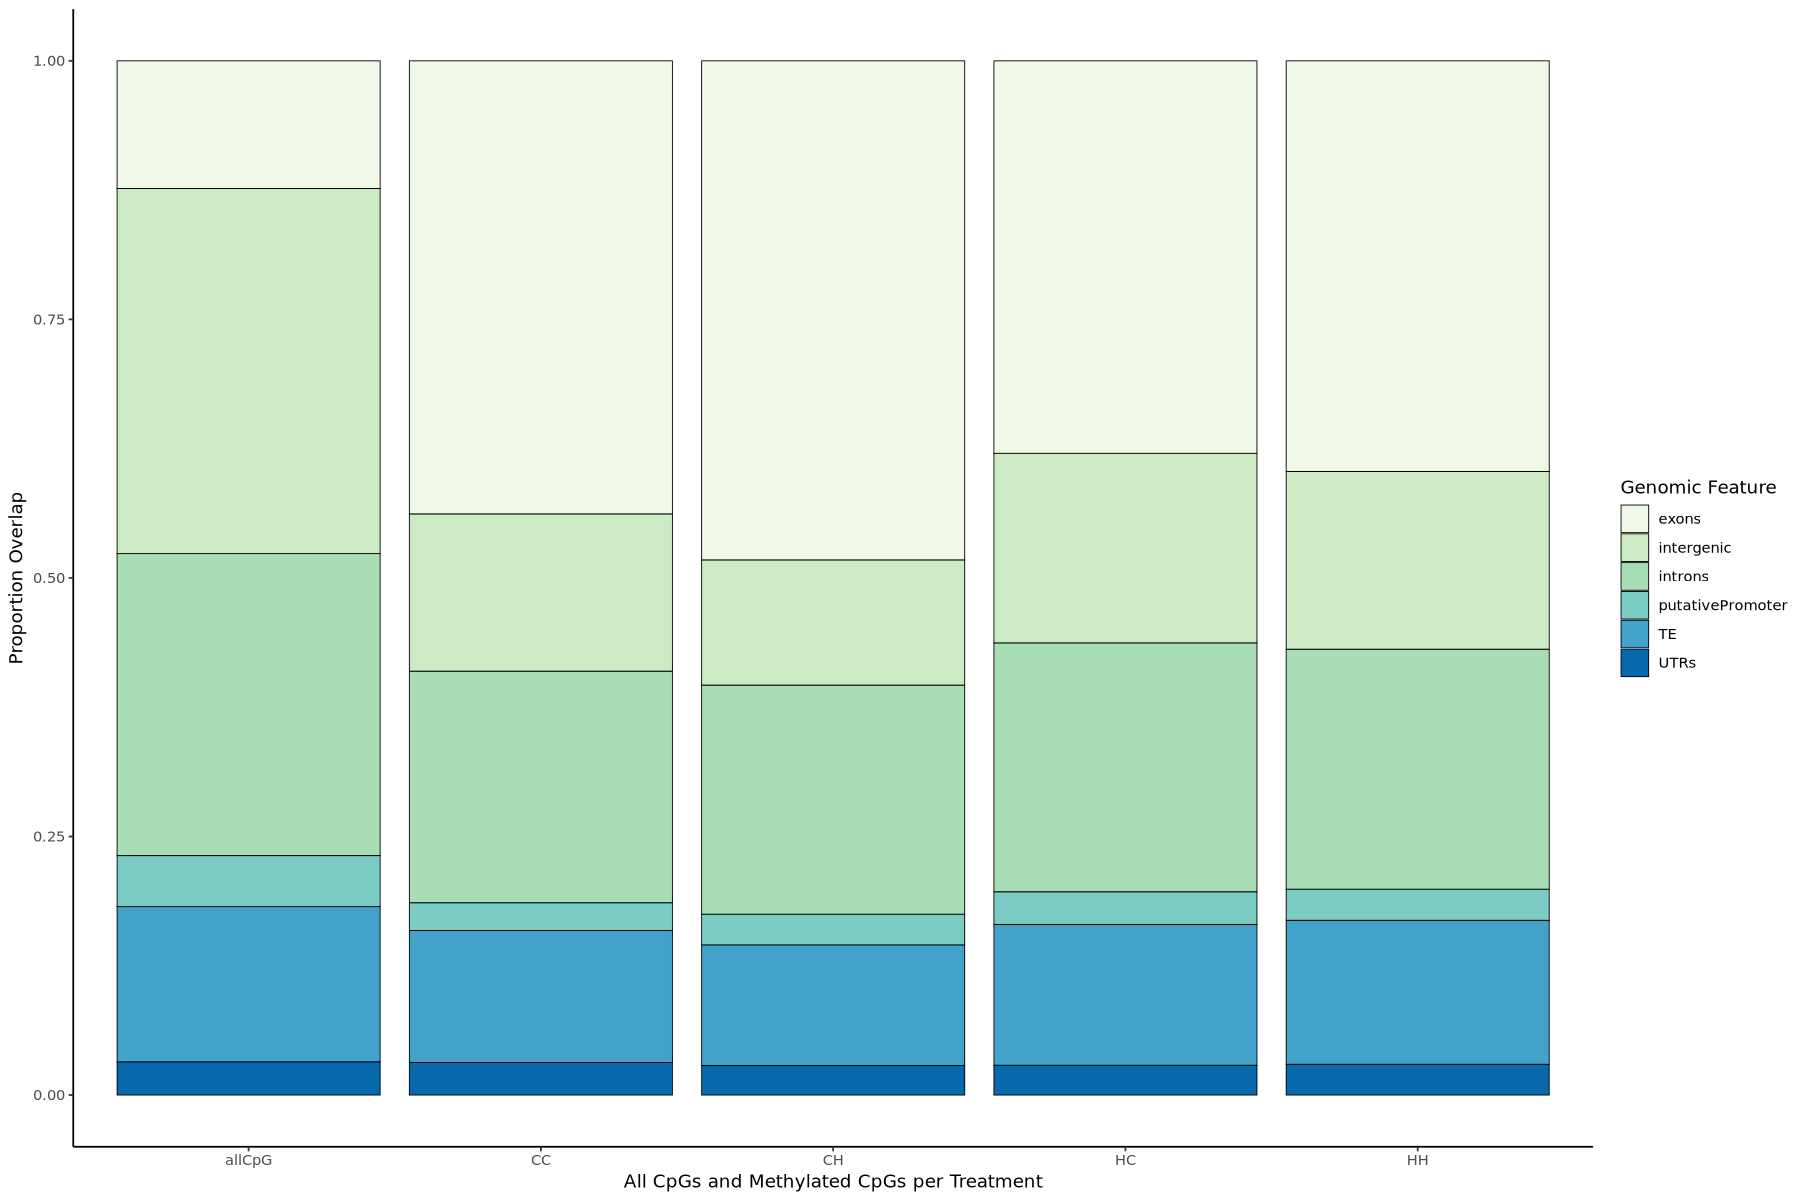

In [6]:
options(repr.plot.width=15, repr.plot.height=10)

propOv <- ggplot(df) +
 aes(x = treatment, y = proportion_overlap, fill = genomicFeature) +
 geom_col() +
 scale_fill_brewer(palette = "GnBu", 
 direction = 1) +
  geom_col(color = "black", linewidth = 0.25) +
 labs(x = "All CpGs and Methylated CpGs per Treatment", y = "Proportion Overlap", 
 fill = "Genomic Feature") +
 theme_classic()

propOv

ggplot with facetting:

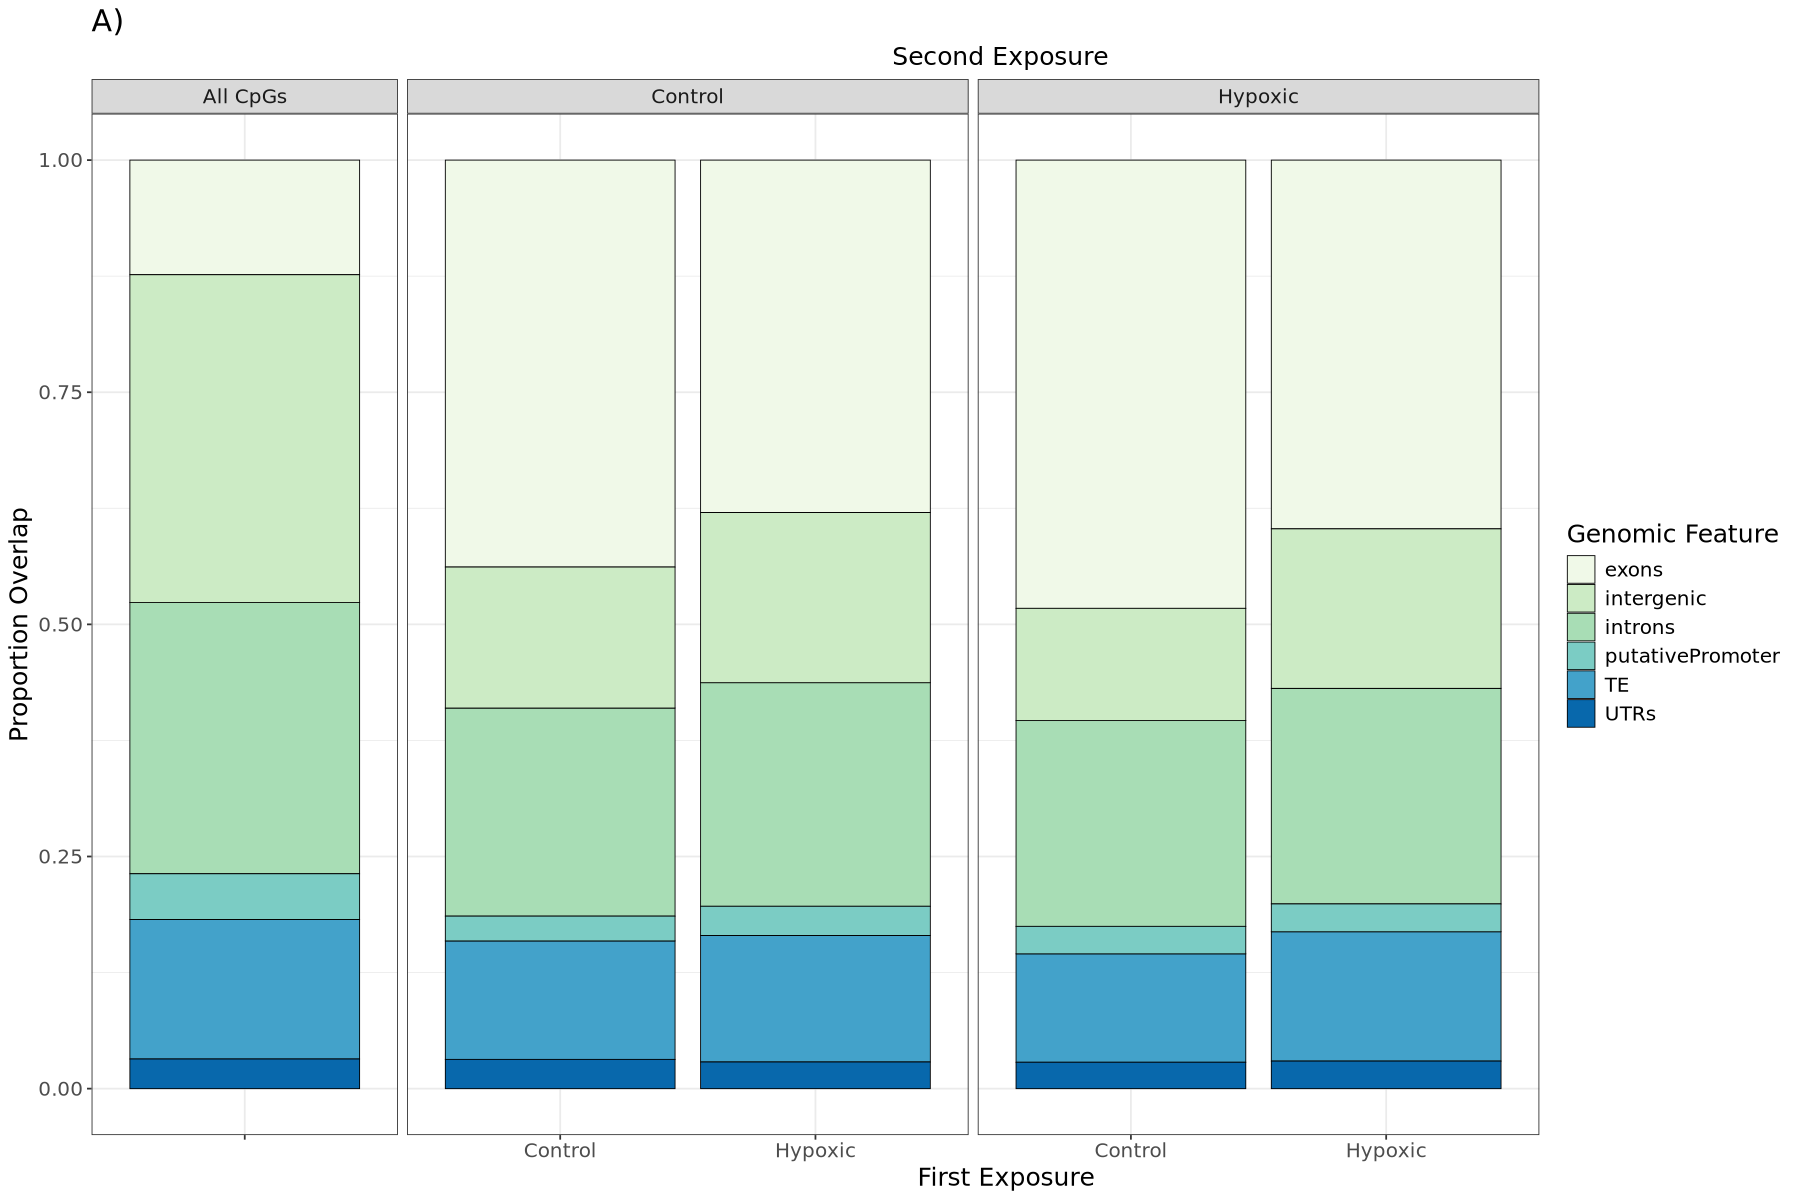

In [62]:
options(repr.plot.width=15, repr.plot.height=10)

propOv <- ggplot(df) +
 aes(x = phase1, y = proportion_overlap, fill = genomicFeature) +
 geom_col() +
 scale_fill_brewer(palette = "GnBu", 
 direction = 1) +
  geom_col(color = "black", linewidth = 0.25) +
 labs(x = "First Exposure", 
      y = "Proportion Overlap", 
      fill = "Genomic Feature",
      title = 'A)',
     subtitle = "Second Exposure") +
facet_grid(~phase2, space = "free_x", scales = "free_x") + 
theme_bw() + 
 theme(text = element_text(size = 15),
       plot.subtitle = element_text(hjust = .65),
       axis.title.x = element_text(hjust = .65))

propOv

In [18]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/propOverlap.pdf', propOv, width=15, height=10)

So the allCpG column shows us the proportion of CpG dinucleotides that overlap with genomic features in the CV genome

CC, CH, HC, and HH show the proportion of *methylated* CpG dinucleotides. We might expect that the distribution of methylated CpGs would be even across genomic features, and therefore reflect the allCpGs column. However, that is not what is being observed - meaning, some genomic features (exons, intergenic regions, promoters) are being disproportionately methylated from what is expected. 

We can then compare CH, HC, and HH to CC to observe differences of methylation distibution in response to varying hypoxic stress.


Even though a first exposure to hypoxia results in more methylation of exons compared to first exposure of control (see [figure](https://github.com/jgmcdonough/CE18_methylRAD_analysis/blob/master/analysis/figures/exonMe_barplot.pdf)), the proportiong of methylation in exons are less in HC and HH compared to CC and CH.

### Conduct chi-squared tests of homogeneity

total vs. CC

In [28]:
# selecting only data for all CpGs and CC
cc <- filter(df, df$treatment == 'CC')$proportion_overlap
allCpG <- filter(df, df$treatment == 'allCpG')$proportion_overlap

# chi-square test
total_CC.test <- chisq.test(allCpG, cc)
total_CC.test

Warning message in chisq.test(allCpG, cc):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  allCpG and cc
X-squared = 30, df = 25, p-value = 0.2243


In [30]:
# selecting only data for all CpGs and CC
ch <- filter(df, df$treatment == 'CH')$proportion_overlap

# chi-square test
total_CC.test <- chisq.test(allCpG, ch)
total_CC.test

Warning message in chisq.test(allCpG, ch):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  allCpG and ch
X-squared = 30, df = 25, p-value = 0.2243


In [31]:
# selecting only data for all CpGs and CC
hc <- filter(df, df$treatment == 'HC')$proportion_overlap

# chi-square test
total_CC.test <- chisq.test(allCpG, hc)
total_CC.test

Warning message in chisq.test(allCpG, hc):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  allCpG and hc
X-squared = 30, df = 25, p-value = 0.2243


In [32]:
# selecting only data for all CpGs and CC
hh <- filter(df, df$treatment == 'HH')$proportion_overlap

# chi-square test
total_CC.test <- chisq.test(allCpG, hh)
total_CC.test

Warning message in chisq.test(allCpG, hh):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  allCpG and hh
X-squared = 30, df = 25, p-value = 0.2243


I suspect I'm not doing something right here...

## formatting plots for manuscript
fig 1A is the prop overlap, fig 1b is the cpg methylation levels (from methylation_level_of_features.ipynb notebook)

In [21]:
# reading in CpGme level df to make boxplot
cpg <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel.csv')
cpg <- cpg[,-1]
head(cpg)

,methyl_count,treatment,methyl_level,phase1,phase2
,<int>,<chr>,<dbl>,<chr>,<chr>
1,147798,CC,1.02,Control,Control
2,59287,CC,0.41,Control,Control
3,137931,CC,0.95,Control,Control
4,81789,CC,0.57,Control,Control
5,33975,CC,0.23,Control,Control
6,138394,HC,0.96,Hypoxic,Control


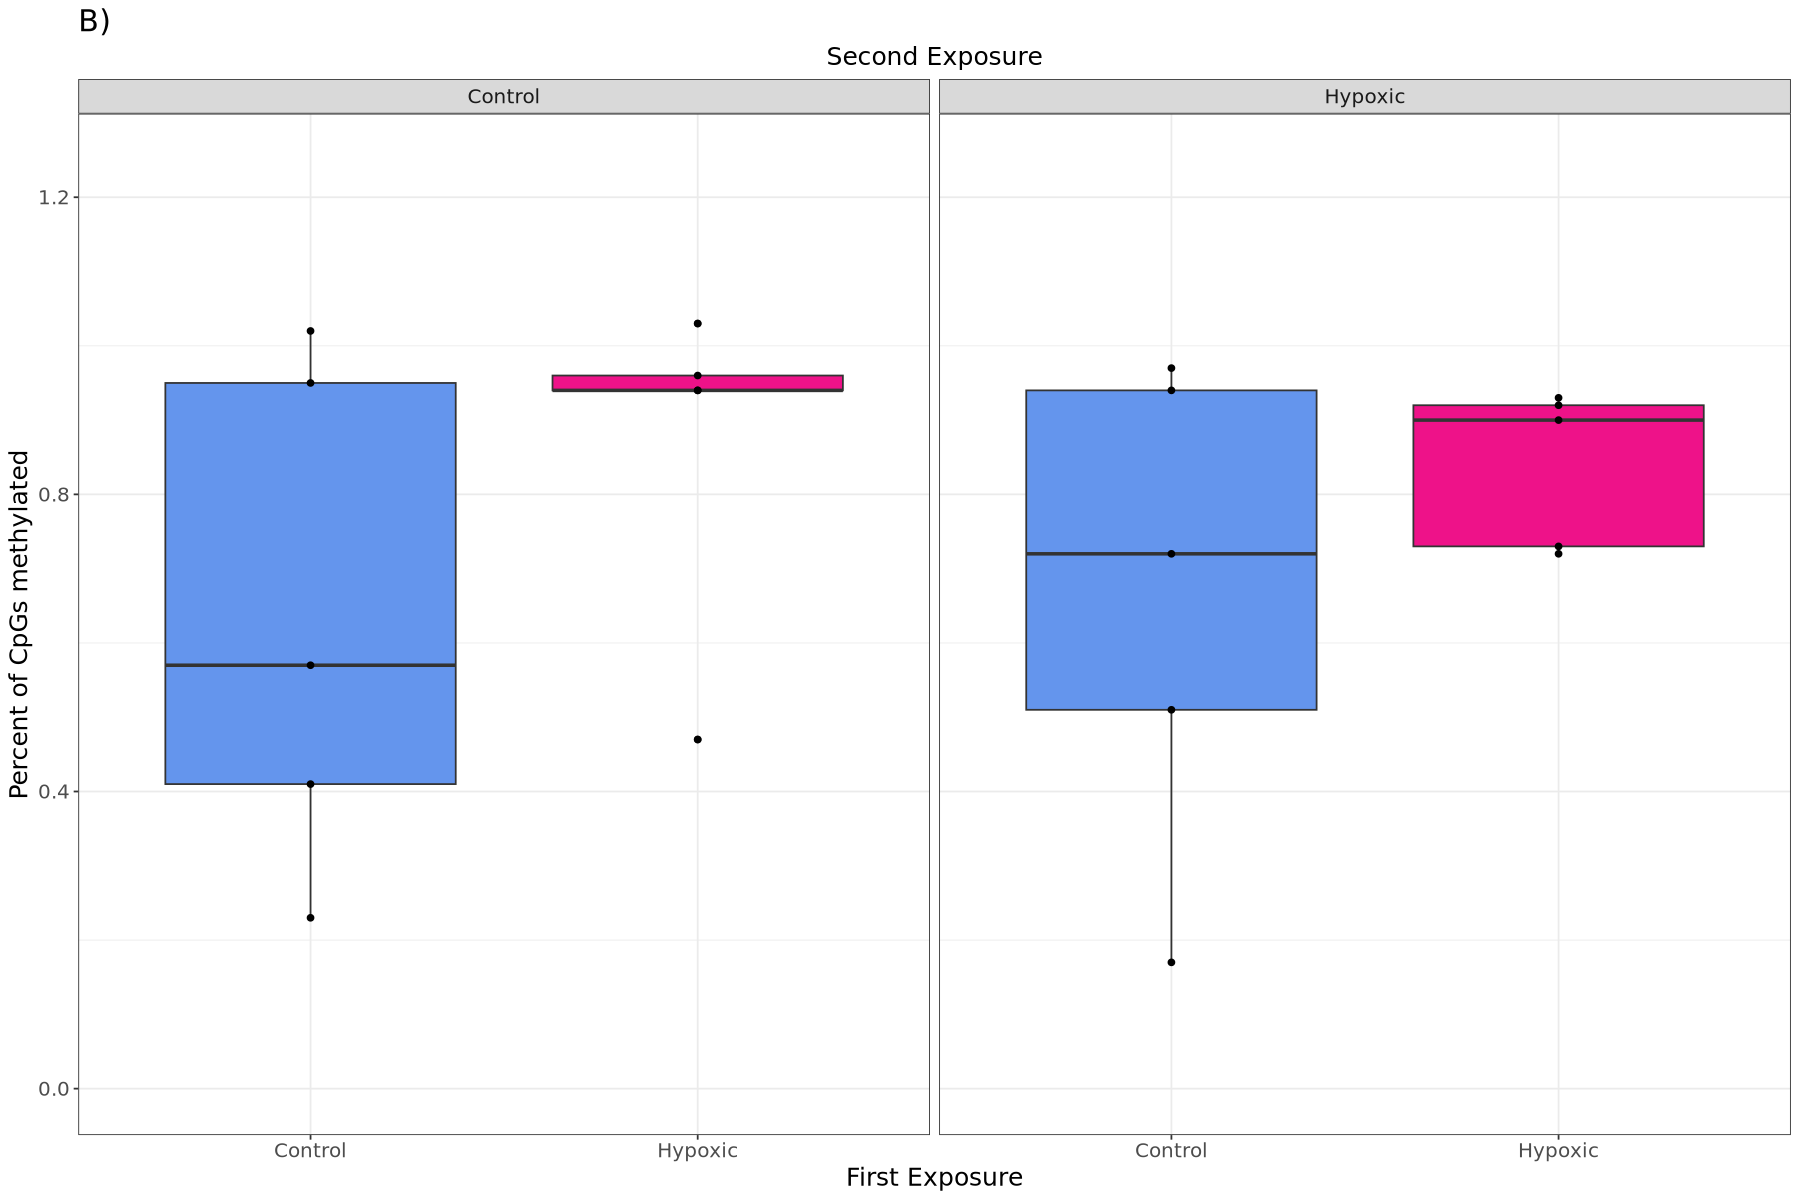

In [61]:
# copied boxplot code
cpgBoxplot <- ggplot(cpg, aes(x = phase1, y = methyl_level, fill = phase1)) +
  geom_boxplot() +
  geom_point() +
  facet_wrap(~ phase2) +
  scale_fill_manual(values=c('cornflowerblue', 'deeppink2')) +
  guides(fill = 'none') +
ylim(0, 1.25) +
  labs(x = "First Exposure", 
       y = "Percent of CpGs methylated",
       title = 'B)',
       subtitle = "Second Exposure") +
  theme_bw() +
  theme(text = element_text(size = 15), plot.subtitle = element_text(hjust=0.5))

cpgBoxplot

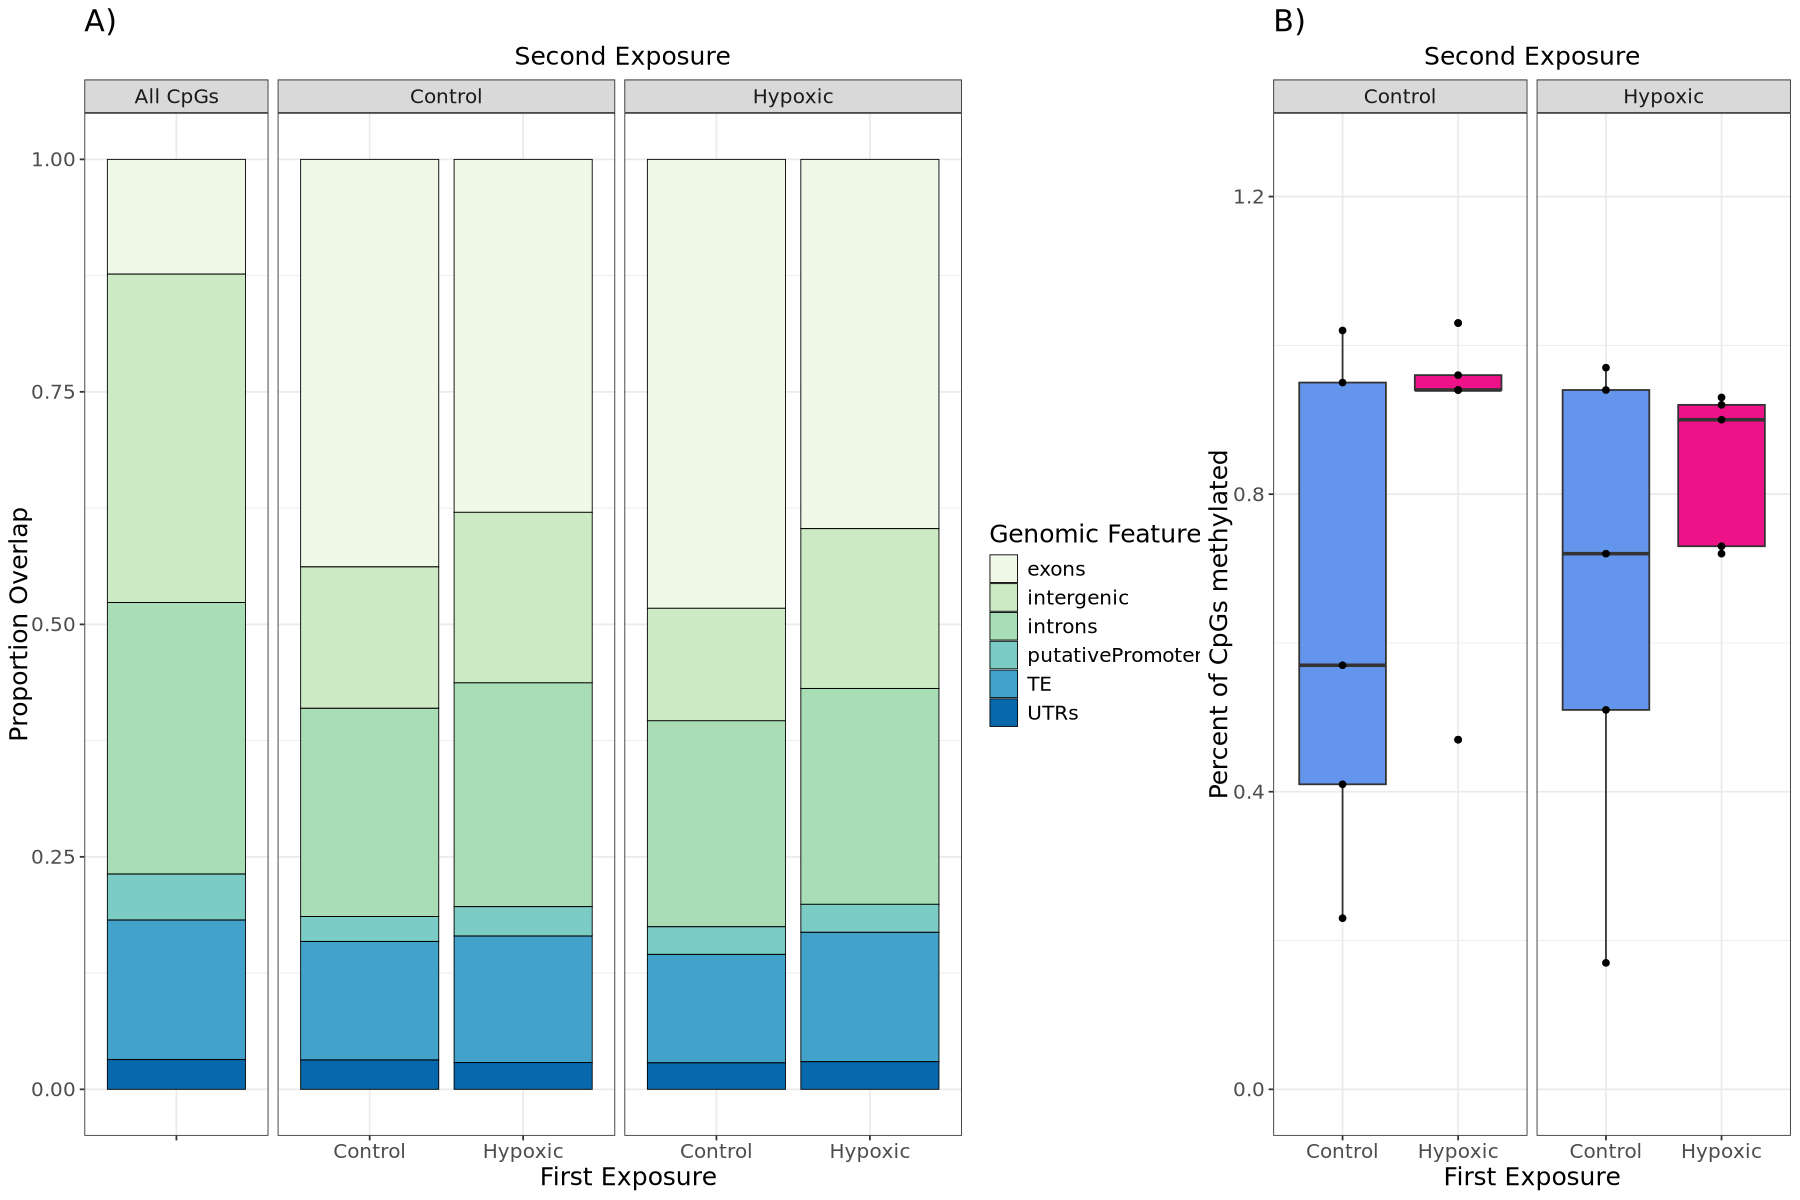

In [63]:
fig1 <- plot_grid(propOv, cpgBoxplot, ncol = 2, rel_widths = c(2, 1))
fig1

In [64]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/fig1.pdf', fig1, width=15, height=5)

# 3/5 replicates for CpG methylation

A CpG dinucleotide is methylated if the majority of the replicates in a treatment (3/5) have at least 5 sequences

repeating code above with new methylation calling

(also, proportion overlap is out of 100%)

In [1]:
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/proportion_overlap/majorityMe_propOverlap.csv')
df

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap
<chr>,<chr>,<int>,<int>,<dbl>
TE,CC,11289,97527,11.58
exons,CC,42577,97527,43.66
introns,CC,19342,97527,19.83
putativePromoter,CC,2081,97527,2.13
UTRs,CC,2964,97527,3.04
intergenic,CC,11929,97527,12.23
no_overlap,CC,7345,97527,7.53
TE,CH,13304,112541,11.82
exons,CH,46527,112541,41.34


In [2]:
# removing underscore in 'no_overlap'
df$genomicFeature <- gsub("no_overlap", "other", df$genomicFeature)
df$genomicFeature <- gsub("putativePromoter", "putative promoters", df$genomicFeature)
df$genomicFeature <- gsub("intergenic", "intergenic regions", df$genomicFeature)
df$genomicFeature <- gsub("TE", "TEs", df$genomicFeature)
df$treatment <- gsub("allCpG", "all CpGs", df$treatment)

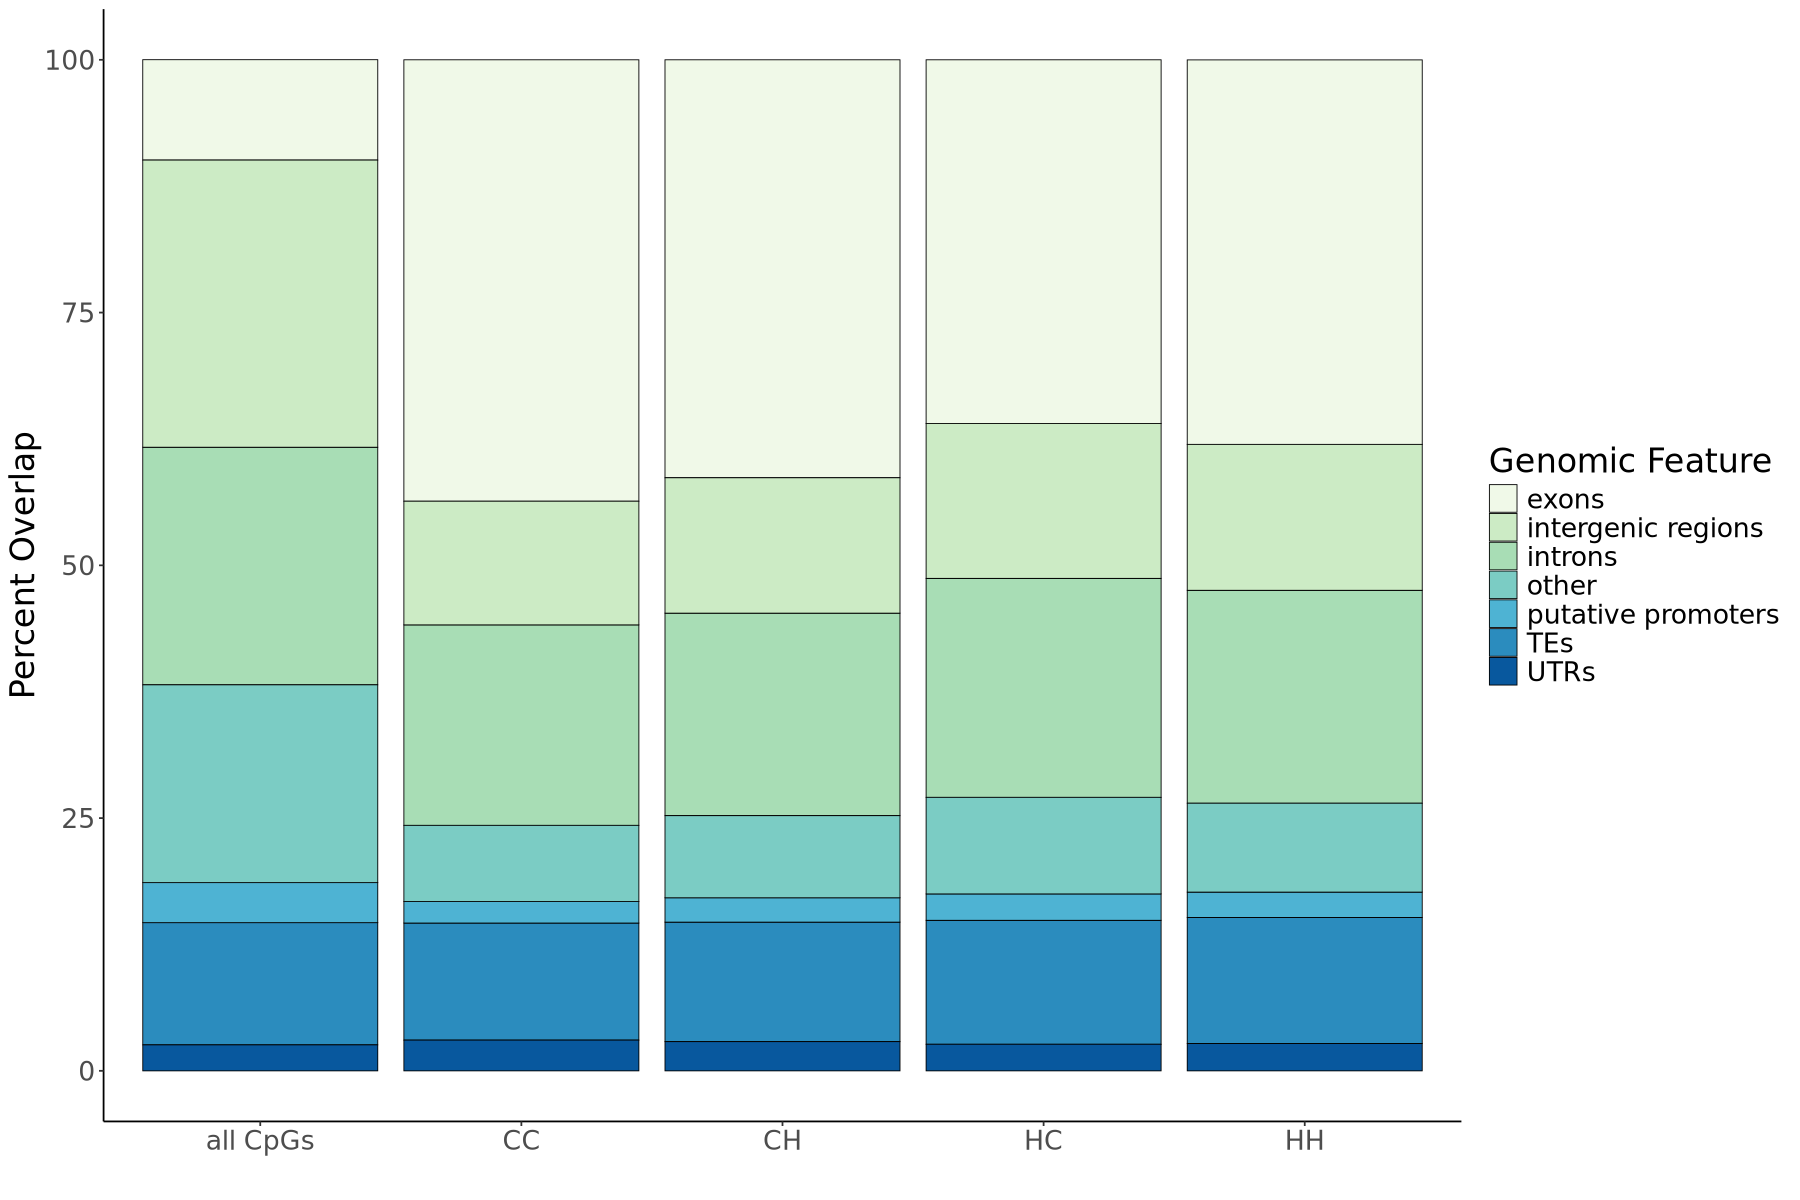

In [4]:
options(repr.plot.width=15, repr.plot.height=10)

propOv <- ggplot(df) +
 aes(x = treatment, y = proportion_overlap, fill = genomicFeature) +
 geom_col() +
 scale_fill_brewer(palette = "GnBu", 
 direction = 1) +
  geom_col(color = "black", linewidth = 0.25) +
 labs(x = "", y = "Percent Overlap", 
 fill = "Genomic Feature") +
 theme_classic() +
theme(text = element_text(size = 20)) 

propOv

want to move the 'other' category to the bottom and make gray (was originally 'no overlap')

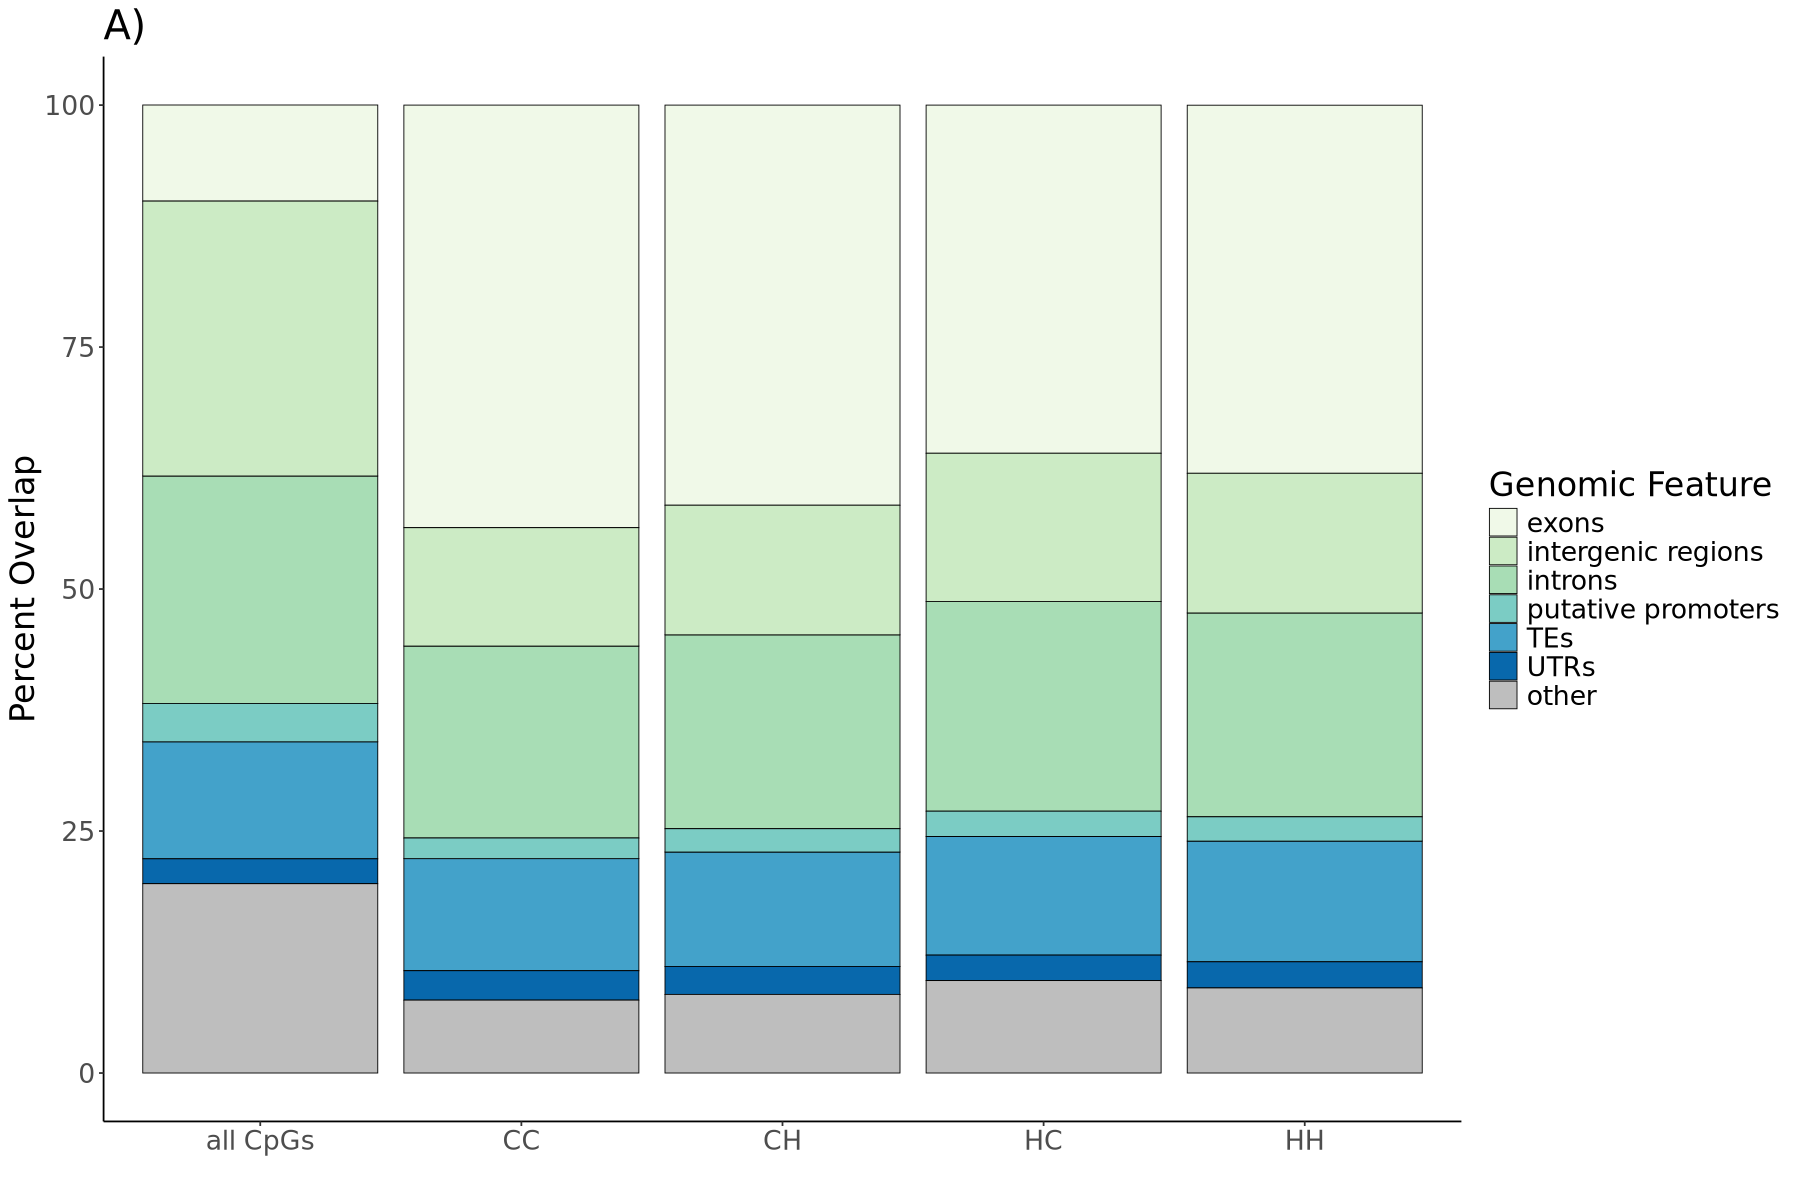

In [5]:
# Convert genomicFeature to a factor and relevel
df$genomicFeature <- as.factor(df$genomicFeature)
df$genomicFeature <- factor(df$genomicFeature, levels = c(setdiff(levels(df$genomicFeature), "other"), "other"))

# Define the color palette
colors <- c("other" = "gray", 
             setNames(brewer.pal(nlevels(df$genomicFeature) - 1, "GnBu"), 
                       levels(df$genomicFeature)[-length(levels(df$genomicFeature))]))


# Update the plot
propOv <- ggplot(df) +
  aes(x = treatment, y = proportion_overlap, fill = genomicFeature) +
  geom_col() +
  scale_fill_manual(values = colors) +
  geom_col(color = "black", linewidth = 0.25) +
  labs(x = "", y = "Percent Overlap", 
       fill = "Genomic Feature",
      title = 'A)') +
  theme_classic() +
  theme(text = element_text(size = 20))

propOv

In [10]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/propOverlap.pdf', propOv, width=15, height=10)

I wonder if it's easier for understanding and consistency to facet this plot

In [6]:
library(dplyr)

df <- df %>%
  mutate(phase1 = case_when(
    substr(df$treatment, 1, 1) == "C" ~ "Control",
    substr(df$treatment, 1, 1) == "H" ~ "Hypoxic",
    TRUE ~ ""
  ),
  phase2 = case_when(
    substr(df$treatment, 2, 2) == "C" ~ "Control",
    substr(df$treatment, 2, 2) == "H" ~ "Hypoxic",
    TRUE ~ "All CpGs"
  ))

df

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap,phase1,phase2
<fct>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>
TEs,CC,11289,97527,11.58,Control,Control
exons,CC,42577,97527,43.66,Control,Control
introns,CC,19342,97527,19.83,Control,Control
putative promoters,CC,2081,97527,2.13,Control,Control
UTRs,CC,2964,97527,3.04,Control,Control
intergenic regions,CC,11929,97527,12.23,Control,Control
other,CC,7345,97527,7.53,Control,Control
TEs,CH,13304,112541,11.82,Control,Hypoxic
exons,CH,46527,112541,41.34,Control,Hypoxic


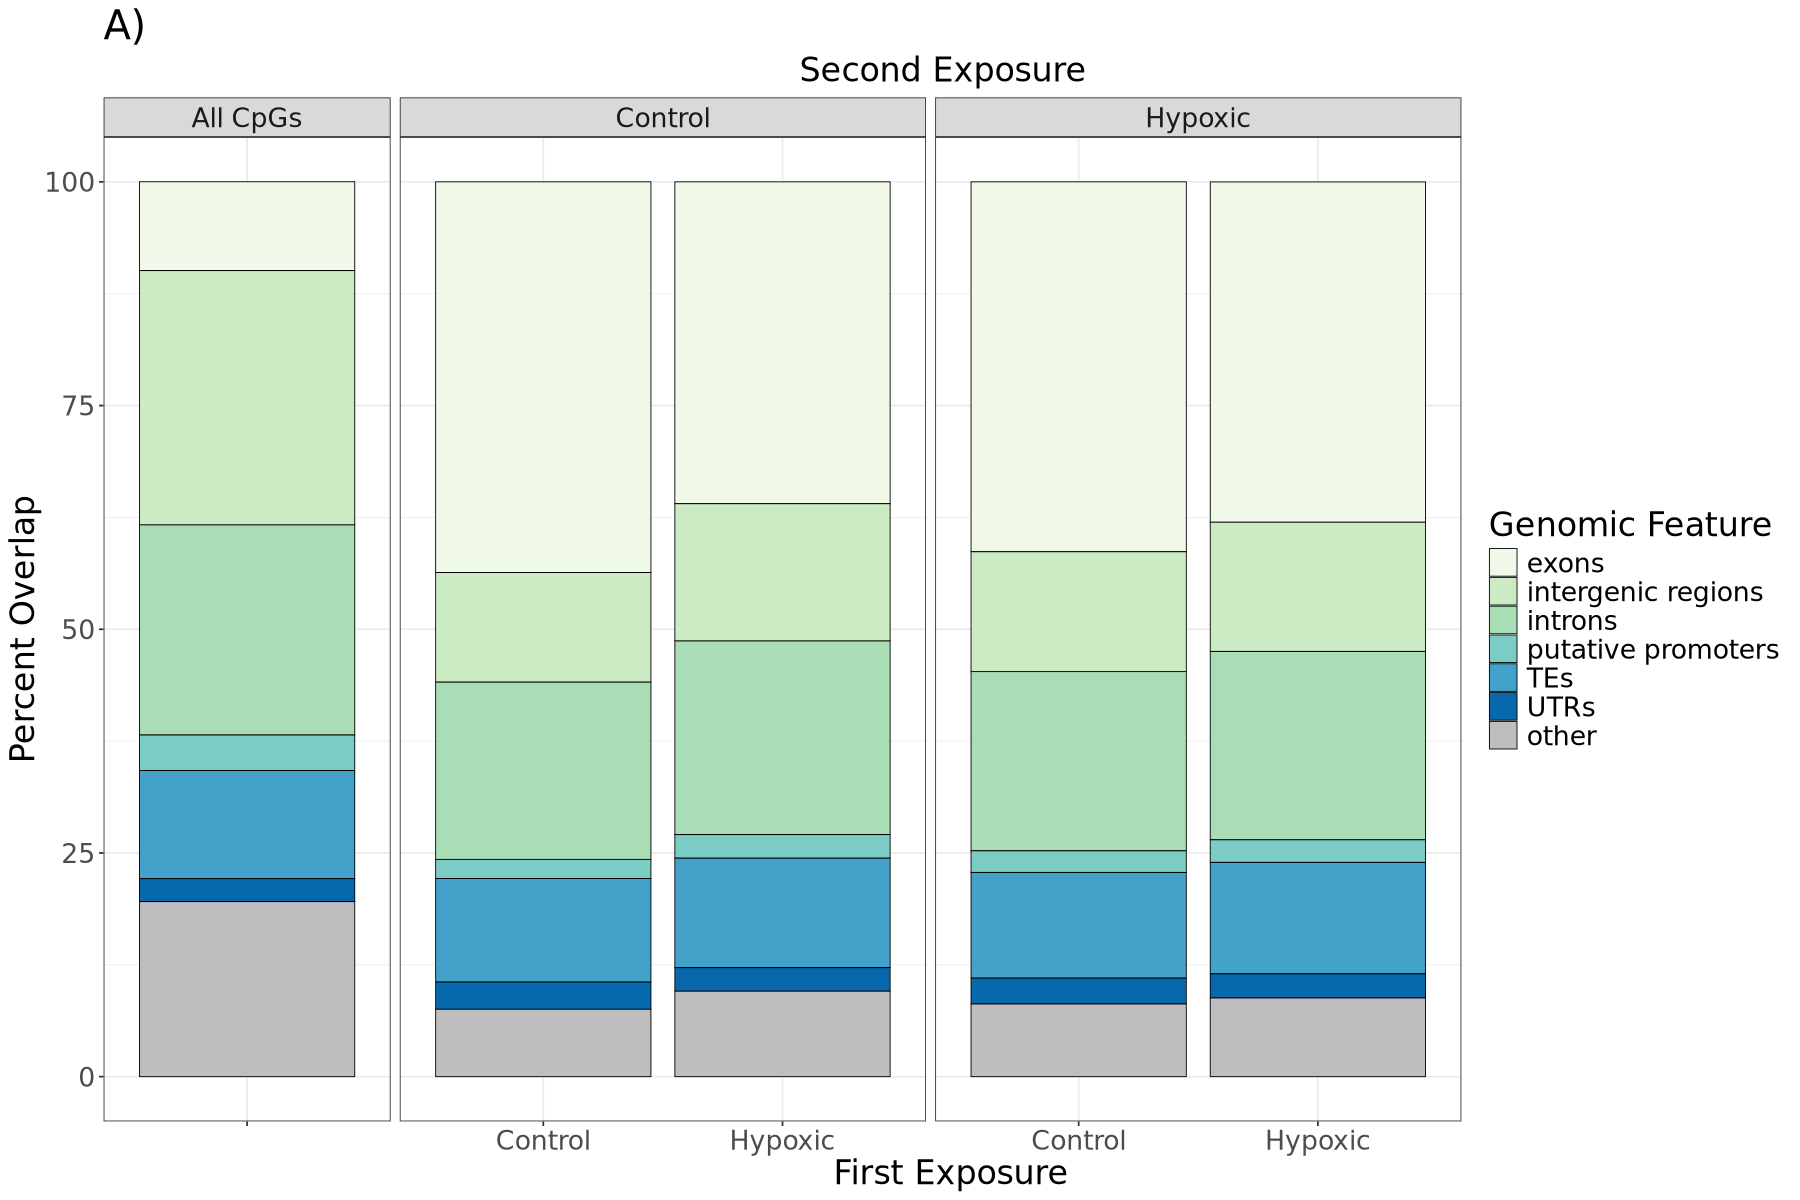

In [7]:

propOv <- ggplot(df) +
  aes(x = phase1, y = proportion_overlap, fill = genomicFeature) +
  geom_col(width = 0.5) +
  scale_fill_manual(values = colors) +
  geom_col(color = "black", linewidth = 0.25) +
  labs(x = "First Exposure", 
       y = "Percent Overlap", 
       fill = "Genomic Feature",
       subtitle = 'Second Exposure',
       title = 'A)') +
  theme_bw() +
  facet_grid(~phase2, space = "free_x", scales = "free_x") + 
  theme(text = element_text(size = 20),
       plot.subtitle = element_text(hjust = .65),
       axis.title.x = element_text(hjust = .65))

propOv

In [26]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/propOverlap_faceted.pdf', propOv, width=15, height=10)

### chi-square test of homogeneity
null hyp: the location of methylated CpGs is independent of the genomic feature

In [8]:
df

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap,phase1,phase2
<fct>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>
TEs,CC,11289,97527,11.58,Control,Control
exons,CC,42577,97527,43.66,Control,Control
introns,CC,19342,97527,19.83,Control,Control
putative promoters,CC,2081,97527,2.13,Control,Control
UTRs,CC,2964,97527,3.04,Control,Control
intergenic regions,CC,11929,97527,12.23,Control,Control
other,CC,7345,97527,7.53,Control,Control
TEs,CH,13304,112541,11.82,Control,Hypoxic
exons,CH,46527,112541,41.34,Control,Hypoxic


In [12]:
trmt_data <- df %>%
filter(phase2 != 'All CpGs')

trmt_data

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap,phase1,phase2
<fct>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>
TEs,CC,11289,97527,11.58,Control,Control
exons,CC,42577,97527,43.66,Control,Control
introns,CC,19342,97527,19.83,Control,Control
putative promoters,CC,2081,97527,2.13,Control,Control
UTRs,CC,2964,97527,3.04,Control,Control
intergenic regions,CC,11929,97527,12.23,Control,Control
other,CC,7345,97527,7.53,Control,Control
TEs,CH,13304,112541,11.82,Control,Hypoxic
exons,CH,46527,112541,41.34,Control,Hypoxic


function to **make contingency table** of a unique treatment combo vs. all CpGs

In [13]:
make_contTable <- function(df, trmt) {
    # pull out proportion overlap values for the unique treatment 
new_df <- df %>%
    filter(treatment == trmt) %>%
    select(genomicFeature, propOverlap) %>%
    column_to_rownames("genomicFeature") %>%
    rename(trmt = propOverlap)
    
    # proportion overlap values for all cpgs to compare to
all_cpg <- df %>%
    filter(treatment == 'all CpGs') %>%
    select(genomicFeature, propOverlap) %>%
    column_to_rownames("genomicFeature") %>%
    rename(all_cpg = propOverlap)
    
    # merge dfs together to make contigency table
merge_df <- cbind(new_df, all_cpg)
return(merge_df)
    
}

In [40]:
CC_cont <- make_contTable(df, 'CC')
CC_cont

CH_cont <- make_contTable(df, 'CH')
CH_cont

HC_cont <- make_contTable(df, 'HC')
HC_cont

HH_cont <- make_contTable(df, 'HH')
HH_cont

,trmt,all_cpg
,<int>,<int>
TEs,11289,2828372
exons,42577,2323389
introns,19342,5497874
putative promoters,2081,926518
UTRs,2964,600840
intergenic regions,11929,6644297
other,7345,4576705


,trmt,all_cpg
,<int>,<int>
TEs,13304,2828372
exons,46527,2323389
introns,22545,5497874
putative promoters,2712,926518
UTRs,3250,600840
intergenic regions,15066,6644297
other,9137,4576705


,trmt,all_cpg
,<int>,<int>
TEs,19594,2828372
exons,57498,2323389
introns,34622,5497874
putative promoters,4177,926518
UTRs,4207,600840
intergenic regions,24496,6644297
other,15273,4576705


,trmt,all_cpg
,<int>,<int>
TEs,18394,2828372
exons,56100,2323389
introns,31070,5497874
putative promoters,3704,926518
UTRs,3986,600840
intergenic regions,21279,6644297
other,12963,4576705


chi-square test 

In [42]:
chisq.test(CC_cont)

chisq.test(CH_cont)

chisq.test(HC_cont)

chisq.test(HH_cont)


	Pearson's Chi-squared test

data:  CC_cont
X-squared = 127351, df = 6, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  CH_cont
X-squared = 127367, df = 6, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  HC_cont
X-squared = 125211, df = 6, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  HH_cont
X-squared = 134568, df = 6, p-value < 2.2e-16


### chi-square between treatment combos

visually, it appears that the proportions are different for the oysters that experienced a first exposure to hypoxia - wondering if there's statistically significant differences between treatment combinations

In [16]:
make_contTable <- function(df, trmt1, trmt2) {
    # pull out proportion overlap values for first unique treatment 
t1 <- df %>%
    filter(treatment == trmt1) %>%
    select(genomicFeature, propOverlap) %>%
    column_to_rownames("genomicFeature") %>%
    rename(trmt1 = propOverlap)
    
    # pull out proportion overlap values for second unique treatment 
t2 <- df %>%
    filter(treatment == trmt2) %>%
    select(genomicFeature, propOverlap) %>%
    column_to_rownames("genomicFeature") %>%
    rename(trmt2 = propOverlap)
    
    # merge dfs together to make contigency table
merge_df <- cbind(t1, t2)
return(merge_df)
    
}

In [26]:
df |> filter(treatment == 'CH') |> select(propOverlap, treatment)

propOverlap,treatment
<int>,<chr>
13304,CH
46527,CH
22545,CH
2712,CH
3250,CH
15066,CH
9137,CH


In [27]:
make_contTable(df, 'CC', 'CH')

,trmt1,trmt2
,<int>,<int>
TEs,11289,13304
exons,42577,46527
introns,19342,22545
putative promoters,2081,2712
UTRs,2964,3250
intergenic regions,11929,15066
other,7345,9137


In [21]:
print('CC vs. CH')
chisq.test(make_contTable(df, 'CC', 'CH'))

print('CC vs. HC')
chisq.test(make_contTable(df, 'CC', 'HC'))

print('HH vs. HC')
chisq.test(make_contTable(df, 'HH', 'HC'))

print('HH vs. CH')
chisq.test(make_contTable(df, 'HH', 'CH'))

print('CH vs. HC')
chisq.test(make_contTable(df, 'CH', 'HC'))

print('CC vs. HH')
chisq.test(make_contTable(df, 'CC', 'HH'))

[1] "CC vs. CH"



	Pearson's Chi-squared test

data:  make_contTable(df, "CC", "CH")
X-squared = 168.52, df = 6, p-value < 2.2e-16


[1] "CC vs. HC"



	Pearson's Chi-squared test

data:  make_contTable(df, "CC", "HC")
X-squared = 1825.3, df = 6, p-value < 2.2e-16


[1] "HH vs. HC"



	Pearson's Chi-squared test

data:  make_contTable(df, "HH", "HC")
X-squared = 198.99, df = 6, p-value < 2.2e-16


[1] "HH vs. CH"



	Pearson's Chi-squared test

data:  make_contTable(df, "HH", "CH")
X-squared = 325.62, df = 6, p-value < 2.2e-16


[1] "CH vs. HC"



	Pearson's Chi-squared test

data:  make_contTable(df, "CH", "HC")
X-squared = 941.96, df = 6, p-value < 2.2e-16


[1] "CC vs. HH"



	Pearson's Chi-squared test

data:  make_contTable(df, "CC", "HH")
X-squared = 922.6, df = 6, p-value < 2.2e-16


I don't think this is the right way to do this.....?

## stat exploration for proportion overlap

for **exons**

In [30]:
# pull out only exons
exons <- df %>%
filter(genomicFeature == 'exons')

exons

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap
<fct>,<chr>,<int>,<int>,<dbl>
exons,CC,42577,97527,43.66
exons,CH,46527,112541,41.34
exons,HC,57498,159867,35.97
exons,HH,56100,147496,38.03
exons,all CpGs,2323389,23397995,9.93


In [35]:
exons %>%
  filter(treatment != 'all CpGs') %>% # remove all CpGs info
  summarise(mean_overlap = mean(proportion_overlap)) # mean proportion overlap of exons in experimental groups

mean_overlap
<dbl>
39.75


9.93% of all CpGs overlap with exons

39.75% of methylated CpGs overlap with exons

**intergenic regions**

In [36]:
# pull out only exons
IR <- df %>%
filter(genomicFeature == 'intergenic regions')

IR

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap
<fct>,<chr>,<int>,<int>,<dbl>
intergenic regions,CC,11929,97527,12.23
intergenic regions,CH,15066,112541,13.39
intergenic regions,HC,24496,159867,15.32
intergenic regions,HH,21279,147496,14.43
intergenic regions,all CpGs,6644297,23397995,28.40


In [37]:
IR %>%
  filter(treatment != 'all CpGs') %>% # remove all CpGs info
  summarise(mean_overlap = mean(proportion_overlap)) # mean proportion overlap of exons in experimental groups

mean_overlap
<dbl>
13.8425


28.40% of all CpGs were in intergenic regions

13.84% of methylated CpGs were in intergenic regions

**putative promoters**

In [38]:
# pull out only exons
pp <- df %>%
filter(genomicFeature == 'putative promoters')

pp

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap
<fct>,<chr>,<int>,<int>,<dbl>
putative promoters,CC,2081,97527,2.13
putative promoters,CH,2712,112541,2.41
putative promoters,HC,4177,159867,2.61
putative promoters,HH,3704,147496,2.51
putative promoters,all CpGs,926518,23397995,3.96


In [39]:
pp %>%
  filter(treatment != 'all CpGs') %>% # remove all CpGs info
  summarise(mean_overlap = mean(proportion_overlap)) # mean proportion overlap of exons in experimental groups

mean_overlap
<dbl>
2.415


3.96% of all CpGs were in intergenic regions

2.46% of methylated CpGs were in intergenic regions

## NSA proportion overlap plot
wanting to collapse all the methylation data for each treatment into one to compare all CpGs vs. methylated CpGs

In [94]:
trmt_group <- c('CC', 'HC', 'CH', 'HH')

prop_df <- df

allMethyl <- prop_df %>%
  filter(treatment != 'all CpGs') %>%
  group_by(genomicFeature) %>%
  summarise(sum = sum(propOverlap))

colnames(allMethyl)[2] <- 'propOverlap'

allMethyl

total_propSum <- sum(allMethyl$propOverlap)

final_methyl <- allMethyl %>%
  mutate(proportion_overlap = round(propOverlap/total_propSum * 100, 2)) %>%
  mutate(treatment = 'methylated CpGs') %>%
  select(genomicFeature, treatment, proportion_overlap)
final_methyl

genomicFeature,propOverlap
<fct>,<int>
exons,202702
intergenic regions,72770
introns,107579
putative promoters,12674
TEs,62581
UTRs,14407
other,44718


genomicFeature,treatment,proportion_overlap
<fct>,<chr>,<dbl>
exons,methylated CpGs,39.17
intergenic regions,methylated CpGs,14.06
introns,methylated CpGs,20.79
putative promoters,methylated CpGs,2.45
TEs,methylated CpGs,12.09
UTRs,methylated CpGs,2.78
other,methylated CpGs,8.64


In [95]:
allCpGs <- prop_df %>%
  filter(treatment == 'all CpGs') %>%
  select(genomicFeature, treatment, proportion_overlap)

new_df <- rbind(final_methyl, allCpGs)
new_df

genomicFeature,treatment,proportion_overlap
<fct>,<chr>,<dbl>
exons,methylated CpGs,39.17
intergenic regions,methylated CpGs,14.06
introns,methylated CpGs,20.79
putative promoters,methylated CpGs,2.45
TEs,methylated CpGs,12.09
UTRs,methylated CpGs,2.78
other,methylated CpGs,8.64
TEs,all CpGs,12.09
exons,all CpGs,9.93


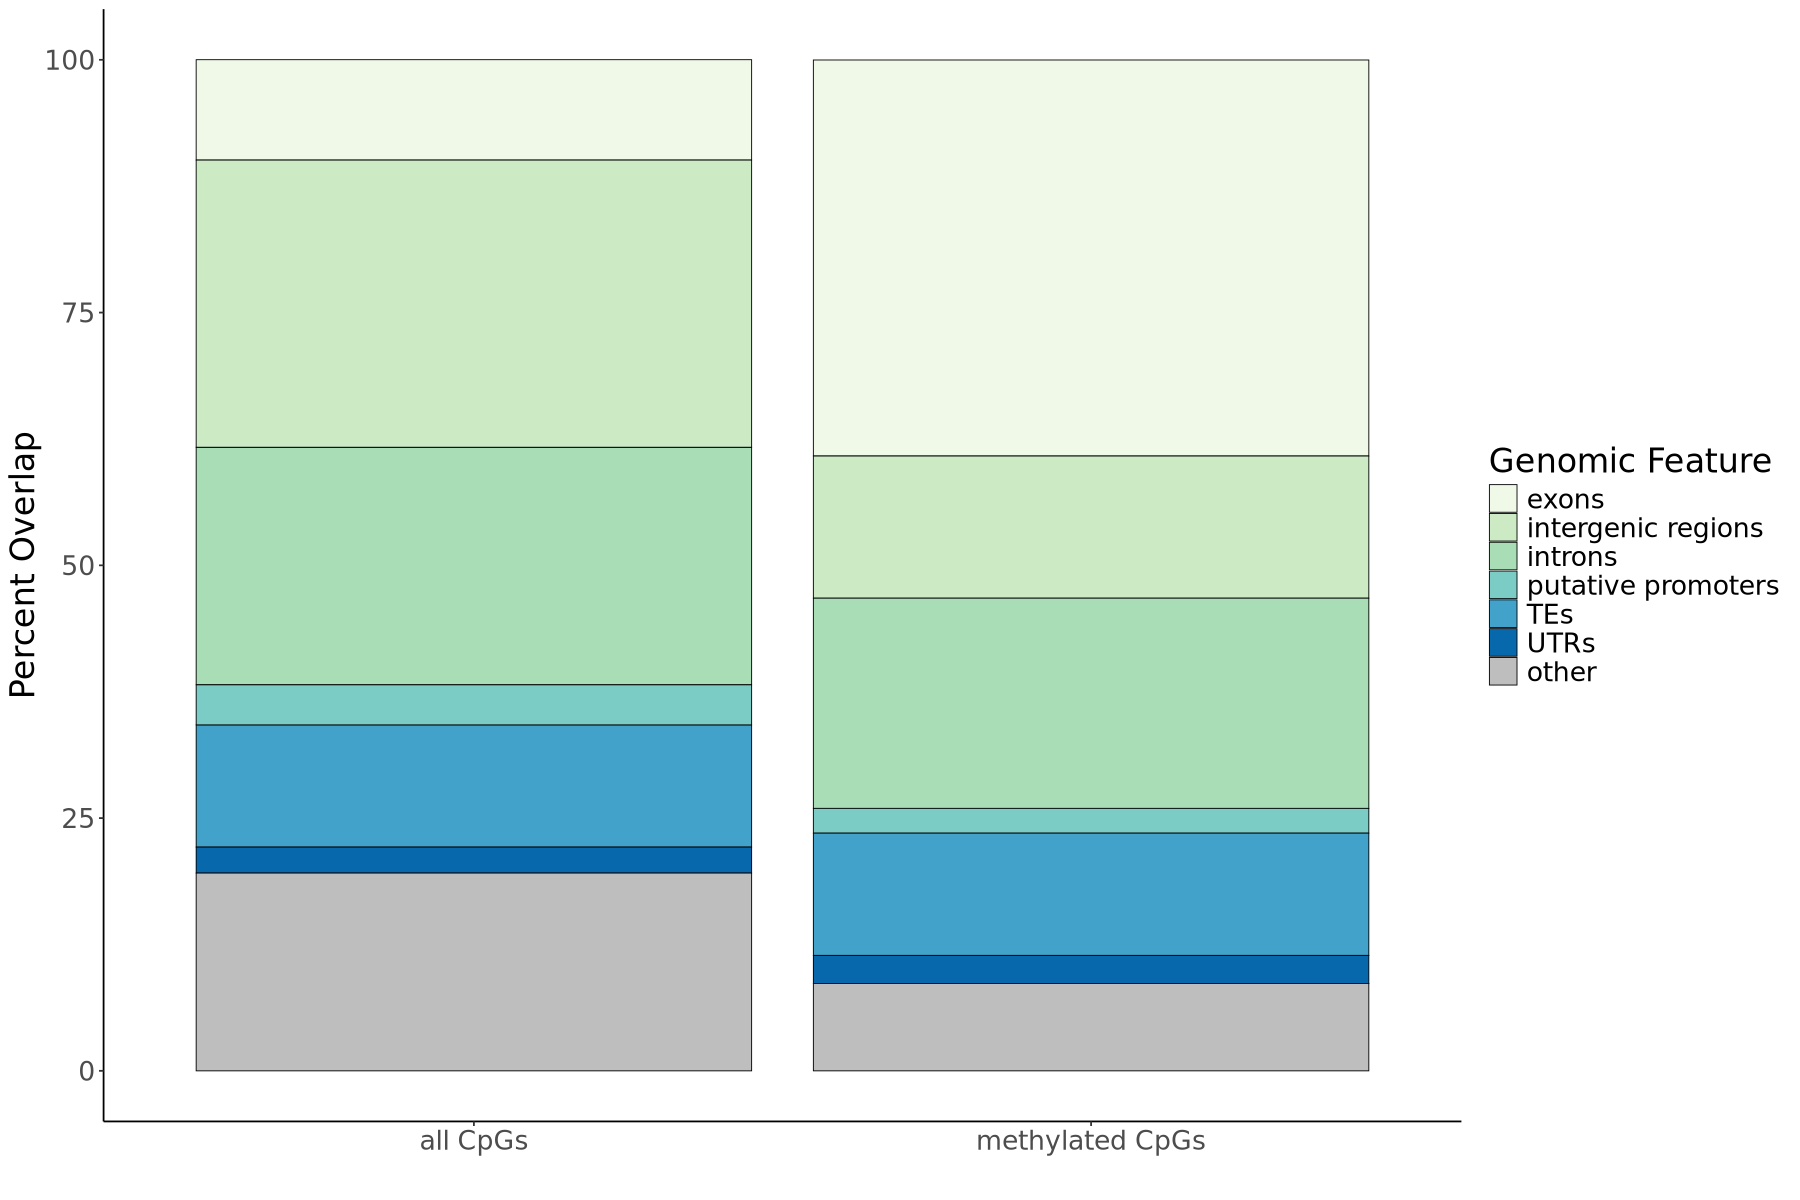

In [22]:
# plotting
options(repr.plot.width=15, repr.plot.height=10)

# Define the color palette
colors <- c("other" = "gray", 
             setNames(brewer.pal(nlevels(new_df$genomicFeature) - 1, "GnBu"), 
                       levels(new_df$genomicFeature)[-length(levels(new_df$genomicFeature))]))

# Update the plot
propOv <- ggplot(new_df) +
  aes(x = treatment, y = proportion_overlap, fill = genomicFeature) +
  geom_col() +
  scale_fill_manual(values = colors) +
  geom_col(color = "black", linewidth = 0.25) +
  labs(x = "", y = "Percent Overlap", 
       fill = "Genomic Feature") +
  theme_classic() +
  theme(text = element_text(size = 20))

propOv


### chi-squared tests of homogeneity

In [123]:
# pull out methylated CpGs
methyl_df <- new_df %>%
filter(treatment == 'methylated CpGs') %>%
select(genomicFeature, proportion_overlap) %>%
rename_with(~ "methylated_CpGs", proportion_overlap)

# pull out all CpGs 
all_df <- new_df %>%
filter(treatment == 'all CpGs') %>%
select(genomicFeature, proportion_overlap) %>%
rename_with(~ "all_CpGs", proportion_overlap)

,all_CpGs,methylated_CpGs
,<dbl>,<dbl>
exons,9.93,39.17
intergenic regions,28.40,14.06
introns,23.50,20.79
other,19.56,8.64
putative promoters,3.96,2.45
TEs,12.09,12.09
UTRs,2.57,2.78


In [125]:
# merge dfs to make contingency table
chi_df <- merge(all_df, methyl_df, by = "genomicFeature")

# make row names the genomic features (columns are the two categorical variables)
rownames(chi_df) <- chi_df$genomicFeature
chi_df <- chi_df[-1] # remove genomic feature in actual table

# finished contingency table
chi_df

,all_CpGs,methylated_CpGs
,<dbl>,<dbl>
exons,9.93,39.17
intergenic regions,28.40,14.06
introns,23.50,20.79
other,19.56,8.64
putative promoters,3.96,2.45
TEs,12.09,12.09
UTRs,2.57,2.78


In [126]:
# run chi square test
methylchi.test <- chisq.test(chi_df)
methylchi.test

Warning message in chisq.test(chi_df):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  chi_df
X-squared = 27.014, df = 6, p-value = 0.0001439


so collapsing all treatments into just methylated CpGs results in a statistically significant result (p-value = 0.0001439), allowing us to reject the null hypothesis that the distribution of methylated CpGs is independent of genomic feature

## overlap WITHIN DMGs
using files generated from [dmg_propOverlap.ipynb](https://github.com/jgmcdonough/CE18_methylRAD_analysis/blob/master/analysis/genomic_feature_tracks/proportion_overlap/dmg_propOverlap.ipynb)

#### 1. pull out significantly DMGs and create bed file

In [2]:
dmg <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs/all_sigDMGs.csv')
head(dmg)

,symbol,name,pair
,<chr>,<chr>,<chr>
1,LOC111117760,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC"
2,LOC111119327,"calcyphosin-like protein, transcript variant X3","CH, HH, CC"
3,LOC111123492,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC"
4,LOC111124674,"gamma-glutamyltranspeptidase 1-like, transcript variant X1","CH, HH, CC"
5,LOC111129146,FERM domain-containing protein 8-like,"CH, HH, CC"
6,LOC111133438,uncharacterized LOC111133438,"CH, HH, CC"


In [4]:
library(rtracklayer)

In [65]:
gff <- as.data.frame(import.gff('/project/pi_sarah_gignouxwolfsohn_uml_edu/Reference_genomes/Cvirginica_genome/CV_working_genomic.gff'))
head(gff)

,seqnames,start,end,width,strand,source,type,score,phase,ID,⋯,num_mismatch,pct_coverage,pct_coverage_hiqual,pct_identity_gap,pct_identity_ungap,rank,Gap,Is_circular,transl_table,codons
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NC_035780.1,1,65668440,65668440,+,RefSeq,region,NA,NA,NC_035780.1:1..65668440,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NC_035780.1,13578,14594,1017,+,Gnomon,gene,NA,NA,gene-LOC111116054,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NC_035780.1,13578,14594,1017,+,Gnomon,lnc_RNA,NA,NA,rna-XR_002636969.1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NC_035780.1,13578,13603,26,+,Gnomon,exon,NA,NA,exon-XR_002636969.1-1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NC_035780.1,14237,14290,54,+,Gnomon,exon,NA,NA,exon-XR_002636969.1-2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,NC_035780.1,14557,14594,38,+,Gnomon,exon,NA,NA,exon-XR_002636969.1-3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [66]:
gff_genes <- gff[grep("LOC", gff$Name),1:12]
head(gff_genes)

,seqnames,start,end,width,strand,source,type,score,phase,ID,Dbxref,Name
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,<list>,<chr>
2,NC_035780.1,13578,14594,1017,+,Gnomon,gene,NA,NA,gene-LOC111116054,GeneID:1....,LOC111116054
7,NC_035780.1,28961,33324,4364,+,Gnomon,gene,NA,NA,gene-LOC111126949,GeneID:1....,LOC111126949
18,NC_035780.1,43111,66897,23787,-,Gnomon,gene,NA,NA,gene-LOC111110729,GeneID:1....,LOC111110729
30,NC_035780.1,85606,95254,9649,-,Gnomon,gene,NA,NA,gene-LOC111112434,GeneID:1....,LOC111112434
38,NC_035780.1,99840,106460,6621,+,Gnomon,gene,NA,NA,gene-LOC111120752,GeneID:1....,LOC111120752
50,NC_035780.1,108305,110077,1773,-,Gnomon,gene,NA,NA,gene-LOC111128944,GeneID:1....,LOC111128944


In [74]:
dmg_gff <- gff_genes[gff_genes$Name %in% dmg$symbol,]
head(dmg_gff)

dim(dmg_gff)
dim(dmg)

,seqnames,start,end,width,strand,source,type,score,phase,ID,Dbxref,Name
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,<list>,<chr>
303,NC_035780.1,315522,340261,24740,+,Gnomon,gene,NA,NA,gene-LOC111133260,GeneID:1....,LOC111133260
543,NC_035780.1,444907,453310,8404,-,Gnomon,gene,NA,NA,gene-LOC111109809,GeneID:1....,LOC111109809
16195,NC_035780.1,9011563,9043404,31842,-,Gnomon,gene,NA,NA,gene-LOC111137635,GeneID:1....,LOC111137635
16555,NC_035780.1,9288063,9301976,13914,-,Gnomon,gene,NA,NA,gene-LOC111132155,GeneID:1....,LOC111132155
27864,NC_035780.1,13324137,13332152,8016,+,Gnomon,gene,NA,NA,gene-LOC111113022,GeneID:1....,LOC111113022
28276,NC_035780.1,13591534,13596982,5449,-,Gnomon,gene,NA,NA,gene-LOC111131329,GeneID:1....,LOC111131329


[1] 217  12

[1] 217   3

In [79]:
write.table(select(dmg_gff, seqnames, start, end), 
              '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/proportion_overlap/dmg_gff.bed',
              row.names = FALSE, col.names = FALSE, sep = "\t", quote = FALSE)

#### 2. make plot

In [80]:
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/proportion_overlap/propOverlap_dmg.csv')
df

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap
<chr>,<chr>,<int>,<int>,<dbl>
exons,CC,862,1557,0.55362877
introns,CC,524,1557,0.33654464
UTRs,CC,171,1557,0.10982659
exons,CH,308,519,0.59344894
introns,CH,187,519,0.36030829
UTRs,CH,24,519,0.04624277
exons,HC,862,1601,0.53841349
introns,HC,585,1601,0.36539663
UTRs,HC,154,1601,0.09618988


In [82]:
library(dplyr)

df <- df %>%
  mutate(phase1 = case_when(
    substr(df$treatment, 1, 1) == "C" ~ "Control",
    substr(df$treatment, 1, 1) == "H" ~ "Hypoxic",
    TRUE ~ ""
  ),
  phase2 = case_when(
    substr(df$treatment, 2, 2) == "C" ~ "Control",
    substr(df$treatment, 2, 2) == "H" ~ "Hypoxic",
    TRUE ~ "All CpGs"
  ))

df

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap,phase1,phase2
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>
exons,CC,862,1557,0.55362877,Control,Control
introns,CC,524,1557,0.33654464,Control,Control
UTRs,CC,171,1557,0.10982659,Control,Control
exons,CH,308,519,0.59344894,Control,Hypoxic
introns,CH,187,519,0.36030829,Control,Hypoxic
UTRs,CH,24,519,0.04624277,Control,Hypoxic
exons,HC,862,1601,0.53841349,Hypoxic,Control
introns,HC,585,1601,0.36539663,Hypoxic,Control
UTRs,HC,154,1601,0.09618988,Hypoxic,Control


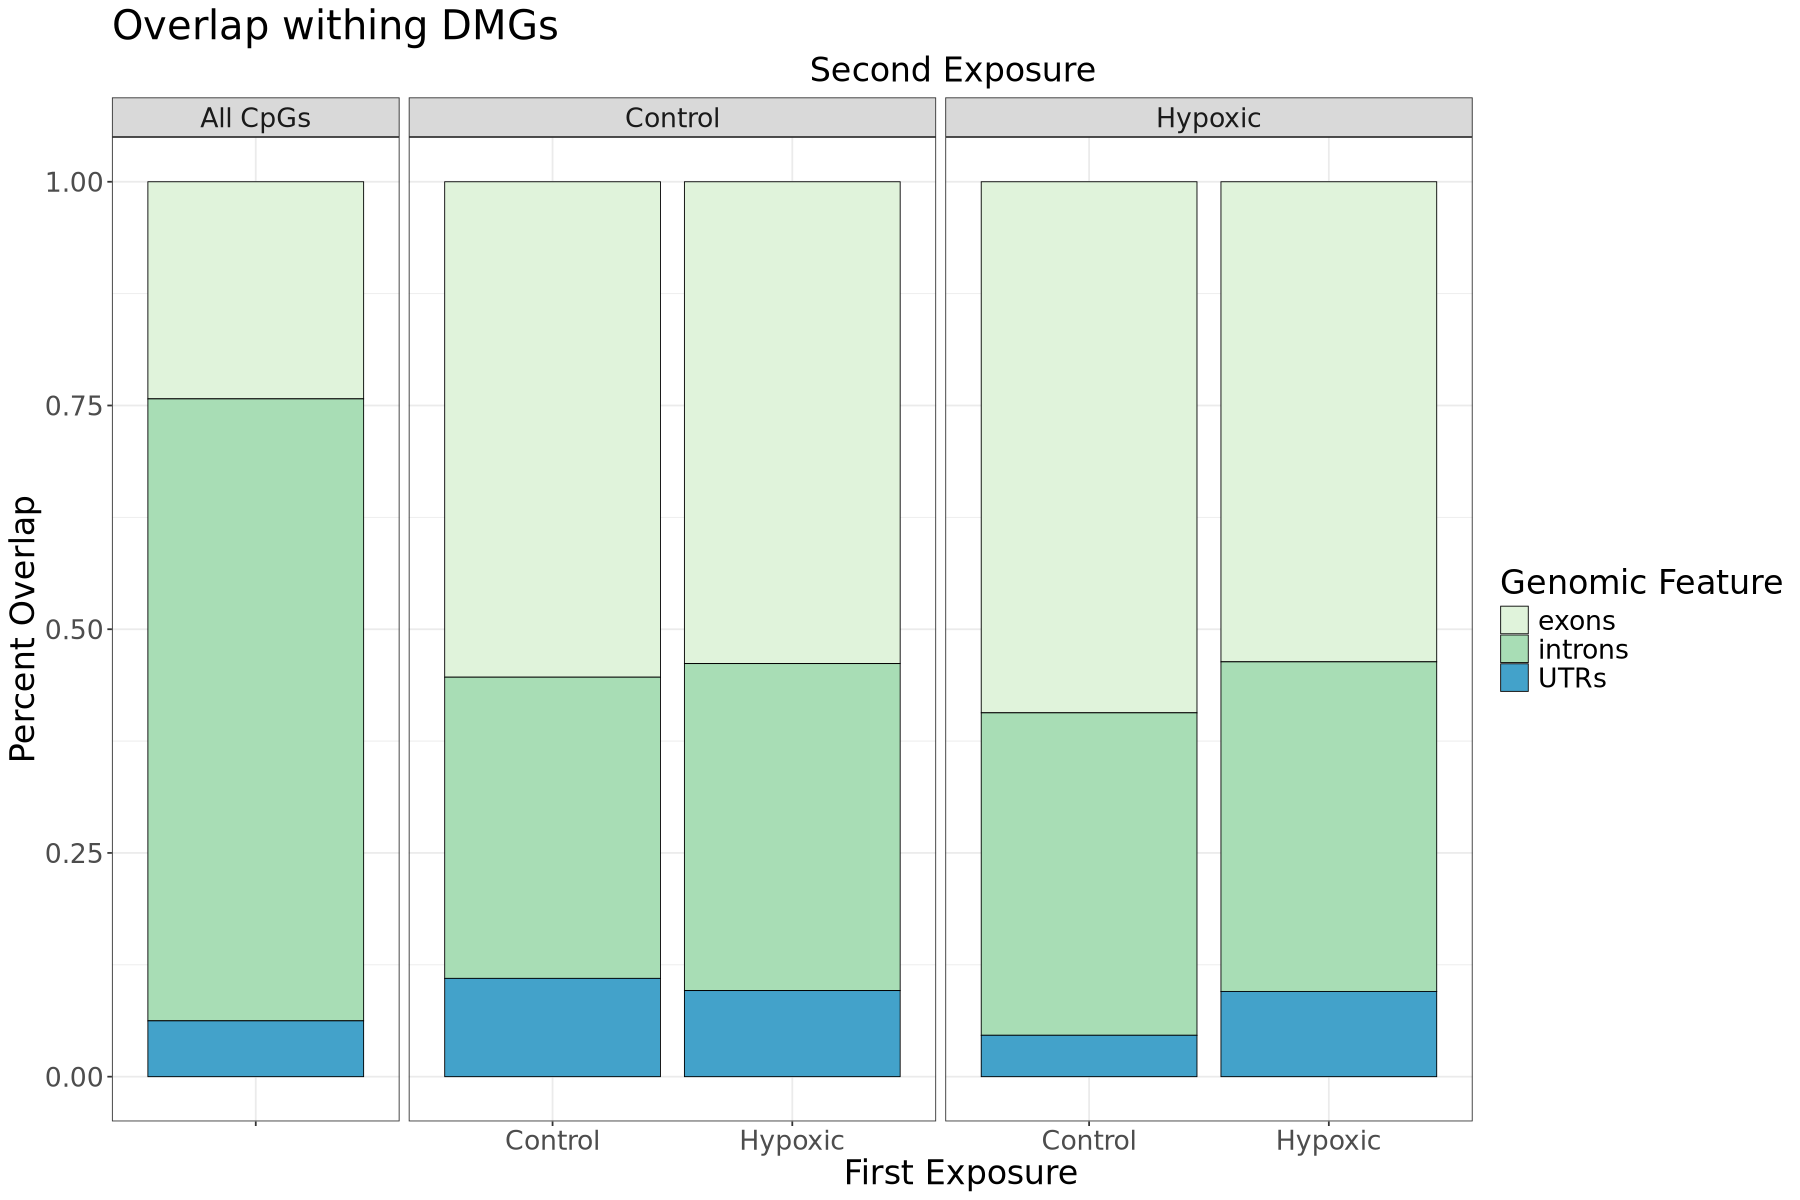

In [85]:

propOv <- ggplot(df) +
  aes(x = phase1, y = proportion_overlap, fill = genomicFeature) +
  geom_col(width = 0.5) +
  scale_fill_brewer(palette = "GnBu", 
 direction = 1) +
  geom_col(color = "black", linewidth = 0.25) +
  labs(x = "First Exposure", 
       y = "Percent Overlap", 
       fill = "Genomic Feature",
       subtitle = 'Second Exposure',
       title = 'Overlap withing DMGs') +
  theme_bw() +
  facet_grid(~phase2, space = "free_x", scales = "free_x") + 
  theme(text = element_text(size = 20),
       plot.subtitle = element_text(hjust = .65),
       axis.title.x = element_text(hjust = .65))

propOv